# Loading the necessary libraries

In [1]:
import pandas as pd
from pathlib import Path
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:/Users/jayac/OneDrive/Desktop/McGill/Enterprise/hotel_booking.csv", low_memory=False)

In [2]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Getting an overview of Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Key points about the dataset structure are:

- Data Types: The DataFrame contains a mix of data types including integers, floating-point numbers, objects, and a datetime column.
- Non-Null Counts: All columns have nearly complete data with 119,390 non-null entries, except for 'children', 'country', 'agent', 'company', and 'days_in_waiting_list', which have fewer non-null values indicating the presence of missing data.
- Columns of Interest:
  - 'is_canceled': A binary integer column indicating if a booking was canceled.
  - 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month': Integer columns related to the timing of the bookings.
  - 'stays_in_weekend_nights', 'stays_in_week_nights': Integer columns indicating the length of stay.
  - 'adults', 'children', 'babies': Floating-point columns indicating the number of people in each booking.
  - 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type': Object columns representing categorical data.
  - 'reservation_status_date': A datetime column detailing when the reservation status was last updated.

# Summary Statistics

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Numeric Variables:

The data reveals the typical booking patterns, durations, and guest demographics, as well as highlighting areas with high variability such as lead time and ADR, which may require further investigation to understand the underlying causes.

- Cancellations: Around 37% of bookings are canceled.
- Lead Time: On average, bookings are made 104 days in advance, but there's significant variability (std of ~106 days), with some bookings made more than two years in advance (max 737 days).
- Arrival Date: The bookings span from the year 2015 to 2017, with most arrivals around the 27th week and the middle of the month.
- Stay Duration: Guests typically stay for about 2.5 weekdays and 0.9 weekend nights. However, some stays are as long as 50 nights.
- Guest Composition: Most bookings are for adults (mean slightly less than 2), with few children or babies.
- Repeat Guests: Only 3.9% of bookings are from repeat guests.
- Cancellations and Previous Bookings: Previous cancellations and non-canceled bookings are relatively low on average, but there are outliers with as many as 26 previous cancellations and 72 previous bookings not canceled.
- Booking Changes: Changes are made to around 22% of bookings.
- Agent/Company Bookings: The involvement of travel agents or companies is significant, with a wide range in the number of bookings handled by different agents/companies.
- Waiting Time: The average days on the waiting list are low, but can go up to 391 days.
- Average Daily Rate (ADR): The average price per night is about $101, with a wide range from negative values (possibly due to refunds or errors) to $5400.
- Car Parking: Very few bookings require parking spaces, but there can be up to 8 spaces required.
- Special Requests: There's an average of 0.57 special requests per booking, with a maximum of 5 requests.

In [5]:
# Get the summary statistics for categorical variables
data.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


Categorical Variables:

This summary provides a high-level understanding of the booking characteristics, customer demographics, and operational specifics such as reservation outcomes and payment methods.

- The dataset contains 119,390 entries and covers two types of hotels, with 'City Hotel' being more common.
- Guests arrive throughout the year, with August being the most common arrival month.
- The 'BB' (Bed & Breakfast) is the most frequent meal type chosen.
- Guests come from 177 different countries, predominantly from Portugal (PRT).
- The 'Online TA' (Travel Agent) is the most common market segment, while the 'TA/TO' (Travel Agent/Tour Operator) is the top distribution channel.
- Room type 'A' is both the most frequently reserved and assigned room type.
- Most bookings do not require a deposit.
- The majority of customers are classified as 'Transient'.
- Most reservations end with the status 'Check-Out', implying the stay was completed.
- The most common date for updating reservation status is October 21, 2015.
- The dataset includes a wide variety of names and email addresses, with 'Michael Johnson' and 'Michael.C@gmail.com' appearing most frequently.
- Each phone number in the dataset is unique.
- There are 9,000 unique credit card numbers used for bookings, with the last four digits '4923' appearing most frequently.

# Plotting Data Distribution

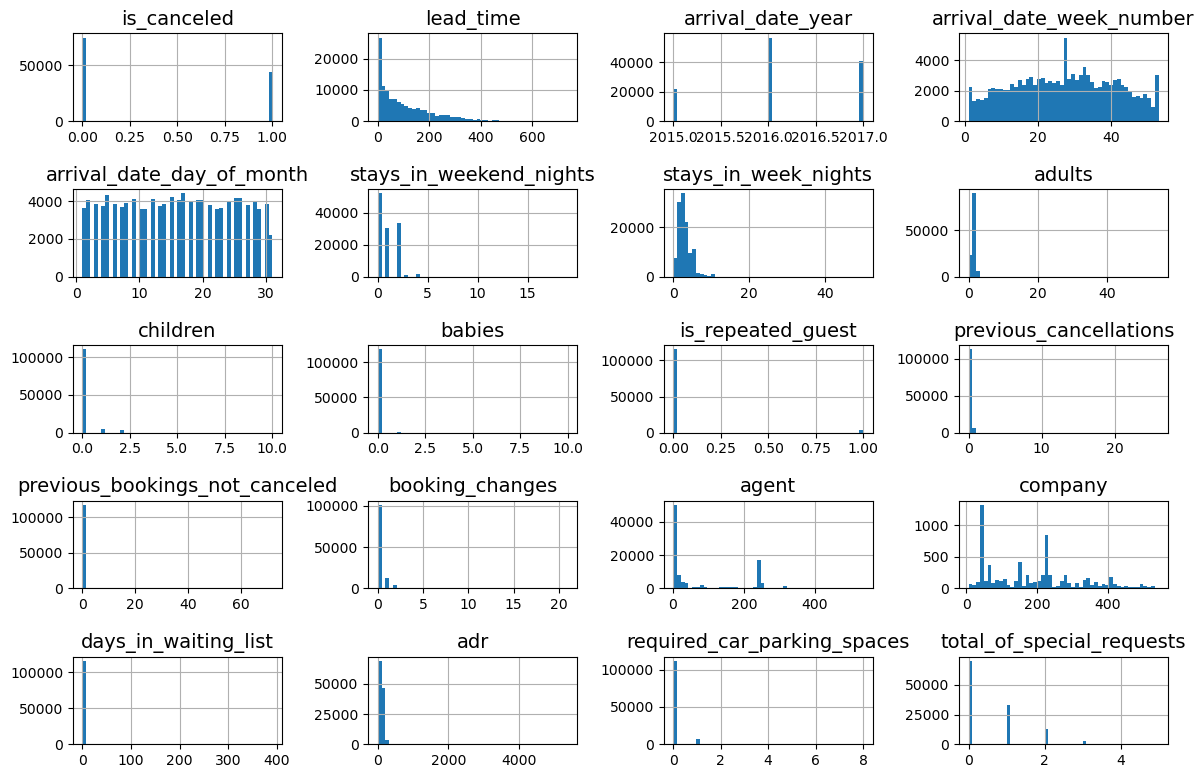

In [6]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.tight_layout()  # This will adjust the subplots to fit into the figure area.
plt.show()

### Based on the plot, we can infer the following about the data distribution:

1. is_canceled: There are fewer cancellations than non-cancellations.

2. lead_time: The distribution is right-skewed, meaning most bookings are made with fewer days in advance, but there are some bookings made with a very long lead time.

3. arrival_date_year: There are bars for perhaps three or four years, with one year having significantly more bookings than others.

4. arrival_date_week_number: Bookings appear to be somewhat evenly distributed throughout the year with slight increases, potentially indicating seasonal trends.

5. arrival_date_day_of_month: This distribution is relatively uniform, suggesting bookings occur throughout the month without significant day-to-day variation.

6. stays_in_weekend_nights and stays_in_week_nights: Both variables are right-skewed, indicating most stays are short, with fewer instances of longer stays.

7. adults: Most bookings are for one or two adults, with very few bookings for larger groups.

8. children and babies: The vast majority of bookings do not include children or babies, showing very low frequencies for bookings with one or more children/babies.

9. is_repeated_guest: A small proportion of bookings are from repeated guests.

10. previous_cancellations and previous_bookings_not_canceled: Both are heavily right-skewed, with most guests having no previous cancellations or bookings.

11. booking_changes: Most bookings have no changes, with a sharp drop-off as the number of changes increases.

12. agent and company: These histograms are likely showing IDs for travel agents or companies associated with the bookings. There are a few with high frequencies, suggesting some agents/companies book more frequently than others.

13. days_in_waiting_list: Almost all bookings have zero days on the waiting list, with very few having to wait one or more days.

14. adr (Average Daily Rate): The distribution is right-skewed with a peak at the lower end of the ADR, suggesting most bookings are at a lower price range with fewer high-priced bookings.

15. required_car_parking_spaces: Nearly all bookings require no car parking spaces.

16. total_of_special_requests: Most bookings have zero special requests, with a decreasing frequency as the number of requests increases.

# Count of Hotel Reservations by Reservation Status

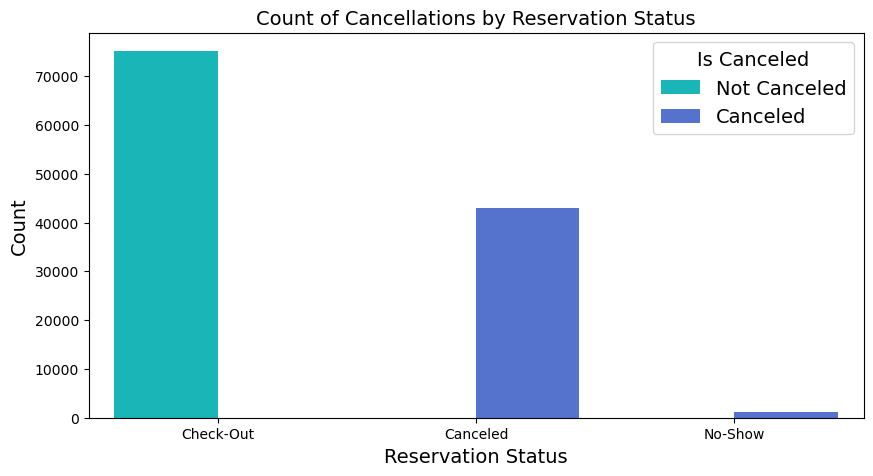

In [7]:
# Bivariate bar plot of 'is_canceled' vs 'reservation_status' with specified colors
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data=data, palette=['darkturquoise', 'royalblue'])
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

#### Based the chart, a large number of reservations resulted in actual stays (check-out), and these were not canceled.There is a significant count of reservations that were canceled, indicating that these bookings did not result in a stay. A smaller number of reservations were classified as no-shows, where the guest did not arrive and did not formally cancel the booking.

#### This confirms that the reservation_status feature is directly related to the is_canceled target variable and including it in the model would cause data leakage. Therefore, it is essential to remove the reservation_status feature before training the model.

# Grouping 'Canceled' and 'No-Show' as 'Canceled' and 'Check-Out' as 'Not Canceled' 

In [8]:
data.groupby('reservation_status')['is_canceled'].mean()

reservation_status
Canceled     1.0
Check-Out    0.0
No-Show      1.0
Name: is_canceled, dtype: float64

reservation_status_date is a date feature that indicates the latest date at which the reservation_status was updated. This feature is directly related to the target variable is_canceled for the following reasons:

If a booking was canceled, the reservation_status_date would be the date on which the booking was canceled, implying that is_canceled should be 1.
On the other hand, if a booking was not canceled, the reservation_status_date would reflect the date of check-out, implying that is_canceled should be 0.
Therefore, the reservation_status_date can indirectly give us information about the value of the target variable, leading to data leakage if it is used as a feature in the model.

However,we can extract some useful information from it.The reservation_status_date column is a date variable that represents the date of the last reservation status. Since it is a date, it will likely be in a 'YYYY-MM-DD' format. We can calculate a new column:

Days_Difference: Calculate the difference in days between the reservation_status_date and the arrival_date to create a new feature representing the number of days between the last reservation status and the arrival dat

In [9]:
# Convert 'reservation_status_date' to datetime format
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Extract Days_Difference from 'reservation_status_date'
data['reservation_status_days_difference'] = (data['reservation_status_date'] - pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month'].astype(str))).dt.days

data[['reservation_status_days_difference']].head()

,reservation_status_days_difference
0,0
1,0
2,1
3,1
4,2


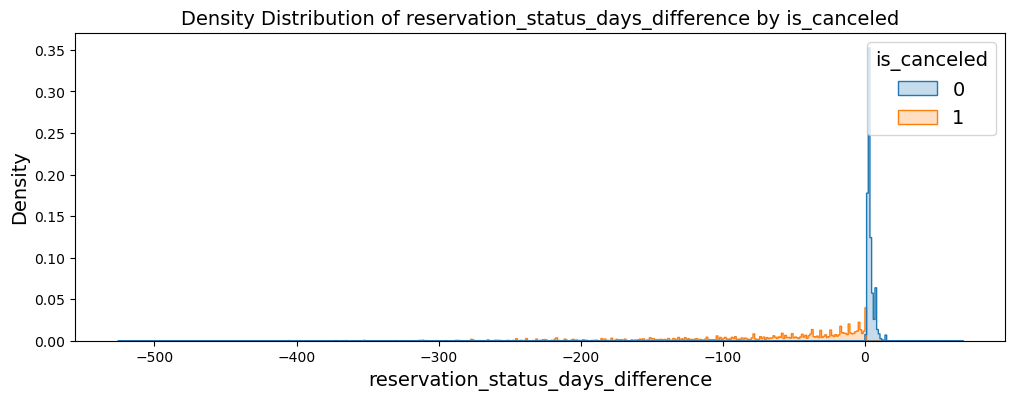

In [10]:
plt.figure(figsize=(12, 4))
sns.histplot(data=data, x="reservation_status_days_difference", hue="is_canceled", element="step", stat="density", common_norm=False)
plt.title('Density Distribution of reservation_status_days_difference by is_canceled')
plt.show()

In [11]:
# For positive values of reservation_status_days_difference
print("Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:\n")
print(data[data['reservation_status_days_difference'] > 0]['is_canceled'].value_counts())

# For negative values of reservation_status_days_difference
print("\n" + "-"*85)
print("\nDistribution of 'is_canceled' when 'reservation_status_days_difference' is negative:\n")
print(data[data['reservation_status_days_difference'] < 0]['is_canceled'].value_counts())

Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:

is_canceled
0    74460
Name: count, dtype: int64

-------------------------------------------------------------------------------------

Distribution of 'is_canceled' when 'reservation_status_days_difference' is negative:

is_canceled
1    42137
Name: count, dtype: int64


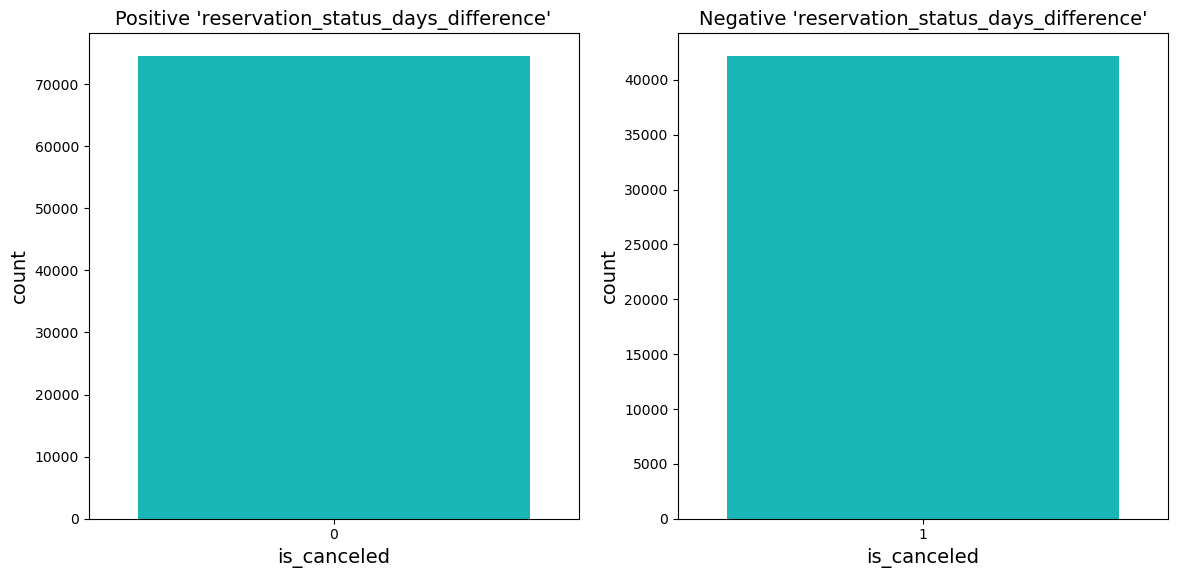

In [12]:
# Filter data into two DataFrames based on the condition
positive_diff = data[data['reservation_status_days_difference'] > 0]
negative_diff = data[data['reservation_status_days_difference'] < 0]

# Prepare the data for plotting
data_to_plot = [
    {'data': positive_diff, 'title': "Positive 'reservation_status_days_difference'"},
    {'data': negative_diff, 'title': "Negative 'reservation_status_days_difference'"}
]

# Plotting
plt.figure(figsize=(12, 6))

for i, item in enumerate(data_to_plot, start=1):
    plt.subplot(1, 2, i)
    sns.countplot(x='is_canceled', data=item['data'],palette=['darkturquoise', 'royalblue'])
    plt.title(item['title'])

plt.tight_layout()
plt.show()

Bookings with a positive 'reservation_status_days_difference' are not canceled. They represent cases where the booking was used and the status was updated after the stay.

Bookings with a negative 'reservation_status_days_difference' are all canceled, which indicate that the reservation was canceled a certain number of days before the expected arrival.

This shows a clear relationship between the reservation_status_days_difference and the is_canceled feature. If a booking is canceled, the reservation status is usually updated before the arrival date. Conversely, if a booking is not canceled, the reservation status is usually updated after the arrival date.

Therefore, it is advisable to omit both the reservation_status_date and the reservation_status_days_difference features from the model. The latter was derived from the former, and both lead to data leakage.

# Exploring some more relationships

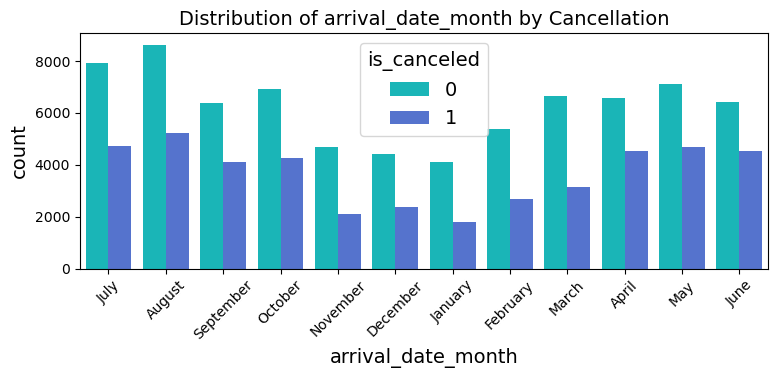

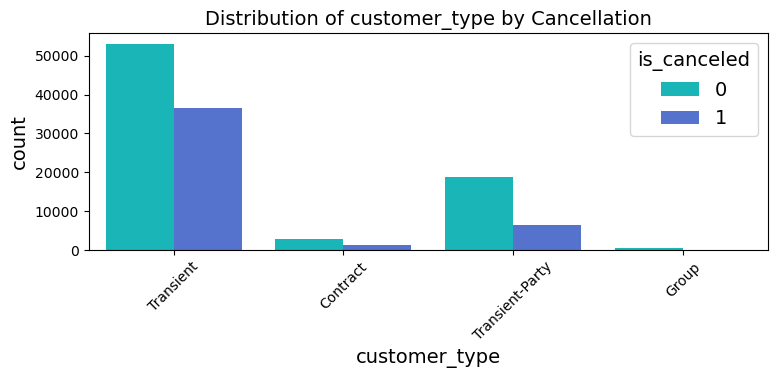

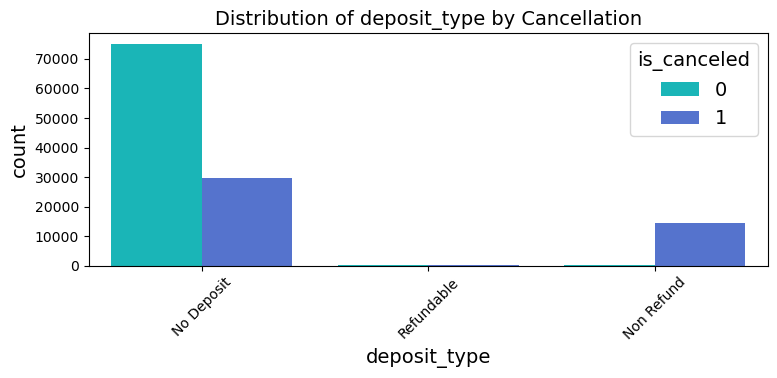

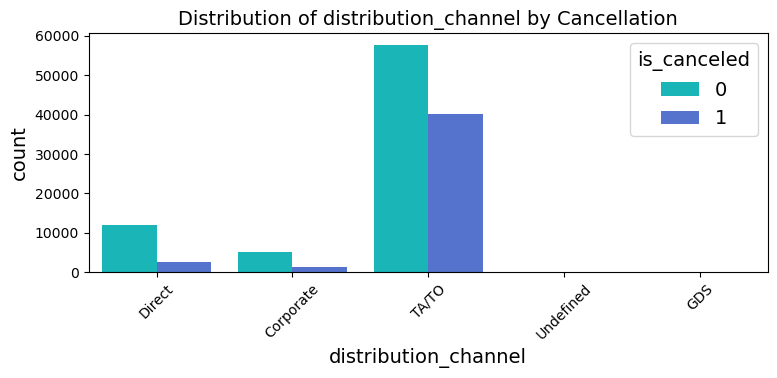

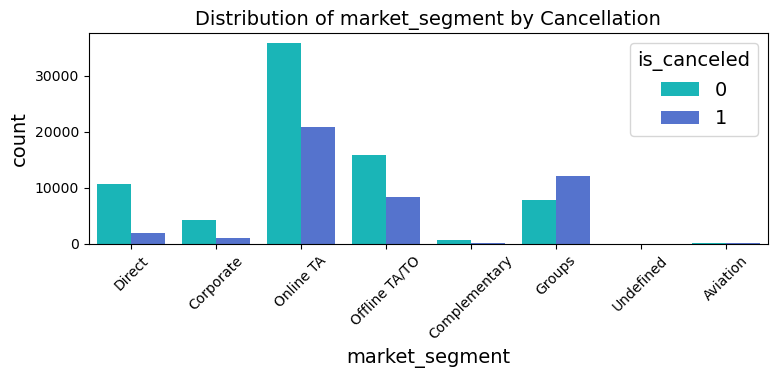

In [13]:
categorical_columns = ['arrival_date_month', 'customer_type', 'deposit_type','distribution_channel', 'market_segment']

# Plotting
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, hue="is_canceled", data=data, palette=['darkturquoise', 'royalblue'])
    plt.title(f'Distribution of {column} by Cancellation')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


1. Chart 1: Both canceled and not canceled bookings are present in every month.There appears to be some seasonality in the booking data. The summer months (July and August) and spring months (March, April, May) show higher overall booking counts. This could be due to the holiday seasons when more people travel.appears to vary by month. Some months, like April, May, and June, have relatively higher cancellations compared to the total number of bookings, whereas months like September and October have a lower proportion of cancellations.July and August have the highest total count of bookings (both canceled and not canceled), indicating peak travel season during these months.

2. Chart 2: The bar chart provides insights into the count of hotel bookings by customer type, differentiated by cancellation status. Transient customers—the largest segment—have a substantial number of both canceled and non-canceled bookings, indicating high turnover. Contract customers have a lower number of bookings, but a significant portion is non-canceled, suggesting more reliable stays. The Transient-Party segment has a relatively balanced distribution of cancellations, while the Group segment shows the least number of bookings.
3. Chart 3: The bar chart illustrates the relationship between the type of deposit and cancellation status for hotel bookings. The majority of bookings are made with no deposit and have a lower cancellation rate compared to those with non-refundable deposits, which show a relatively high cancellation rate. Bookings made with refundable deposits have the least count. This could indicate that guests are less likely to cancel when they've made a financial commitment, especially if the deposit is non-refundable.
4. Chart 4: The bar chart presents the distribution of hotel bookings by distribution channel. This information could be vital for assessing the effectiveness and reliability of each distribution channel.The TA/TO (Travel Agent/Tour Operator) channel has the highest count of bookings suggesting it's the most utilized channel for making reservations. The Direct and Corporate channels have a lower overall number of bookings, but the Direct channel shows a higher rate of non-cancellations relative to cancellations compared to the Corporate channel.
5. Chart 5: The bar chart shows the count of hotel bookings by market segment, broken down by cancellation status. The Online TA (Travel Agent) segment has the highest overall count of bookings and a significant proportion of these bookings were canceled. The Offline TA/TO segment also has a substantial number of bookings with a relatively high cancellation rate. Direct bookings appear to have a lower cancellation rate compared to the TA/TO segments. Corporate, Complementary, Groups, and Aviation have fewer bookings in comparison, with the Groups segment showing a balanced distribution between canceled and non-canceled bookings. This distribution suggests that the market segment is a considerable factor in the likelihood of cancellations, with online bookings showing a tendency for higher cancellations.

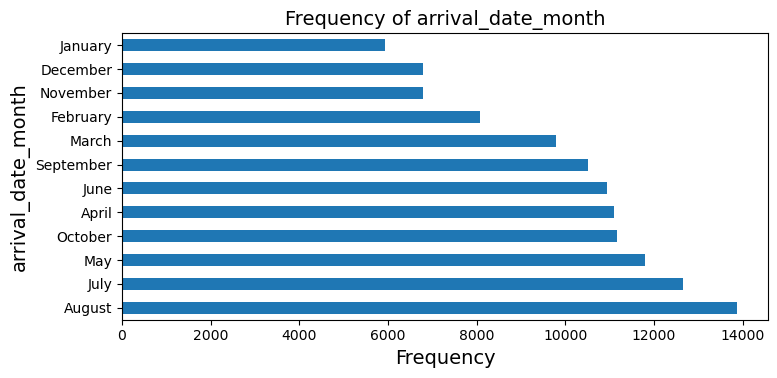

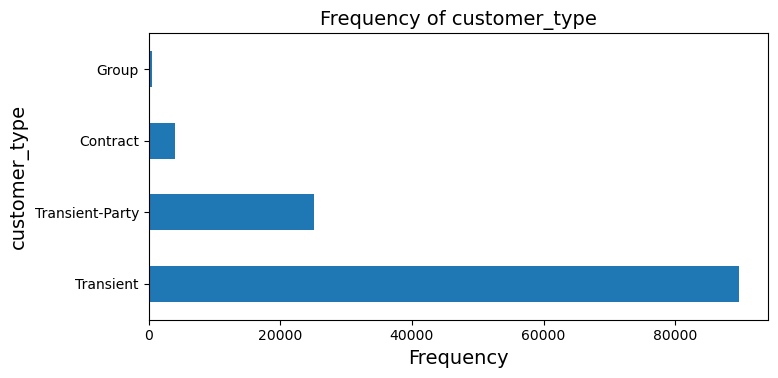

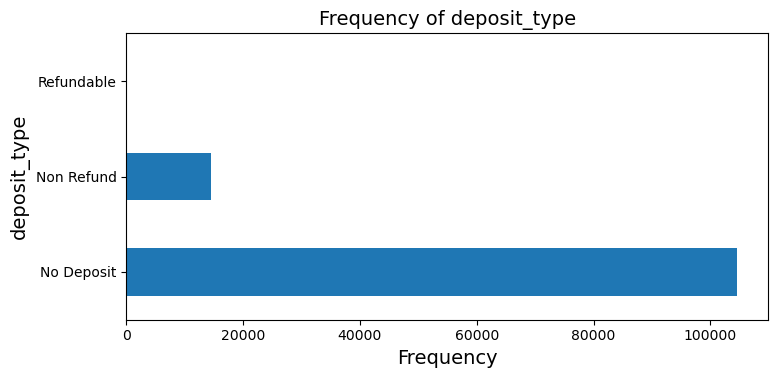

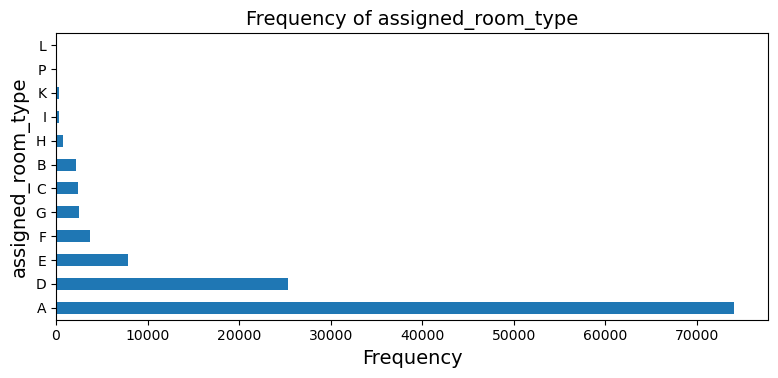

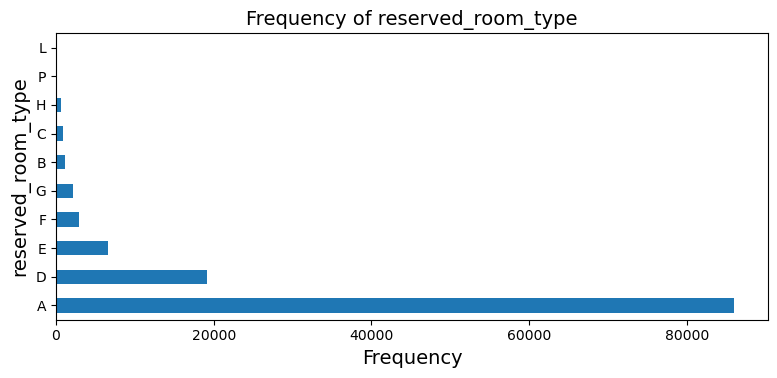

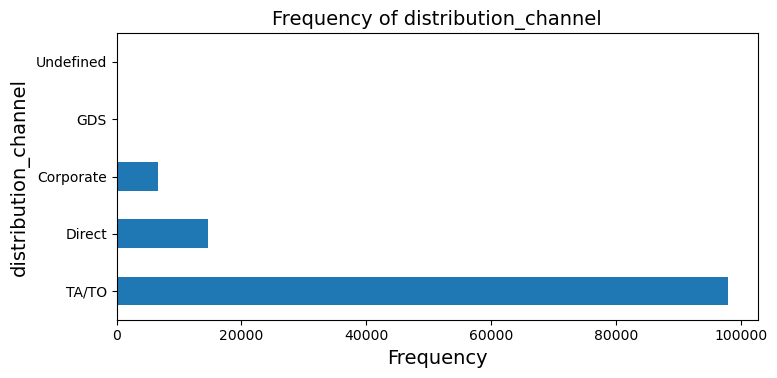

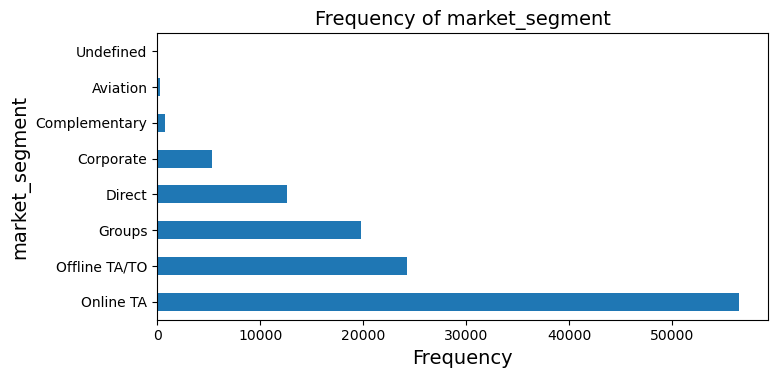

In [14]:
categorical_columns = ['arrival_date_month', 'customer_type', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
                      'distribution_channel', 'market_segment']

# Plotting
for column in categorical_columns:
    # Calculate frequency of each category
    value_counts = data[column].value_counts()

    
    # Create horizontal bar chart
    plt.figure(figsize=(8, 4))
    value_counts.plot(kind='barh')  # 'barh' creates a horizontal bar chart
    plt.title(f'Frequency of {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.tight_layout()  # Adjust layout to make room for the longer labels
    plt.show()

Insights:

1. The arrival date month chart shows that August is the busiest month for hotel arrivals, followed by July, indicating a peak season during the summer months.

2. The customer type chart reveals that the majority of hotel customers are transient, suggesting that most business comes from individuals or walk-in guests rather than contracted groups or companies.

3. The deposit type chart indicates that most bookings do not require a deposit, which could imply a hotel policy designed for ease of booking or a specific customer preference pattern.

4. The assigned room type chart demonstrates a clear preference or higher availability for certain room types, with 'A' type rooms being the most frequently assigned.

5. The reserved room type chart closely mirrors the assigned room type chart, indicating consistency in room booking and assignment.

6. The distribution channel chart shows that the majority of bookings come through Travel Agents/Tour Operators (TA/TO), highlighting their importance in the hotel booking process.

7. Lastly, the market segment chart emphasizes that the majority of bookings are made through Online Travel Agents (Online TA), which aligns with current trends in the travel industry towards digital booking platforms.

# Top 10 Countries by Customer Count, Cancellations and Non-Cancellations

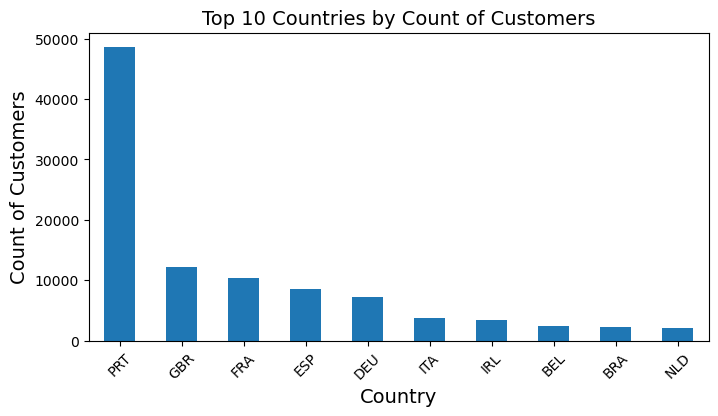

In [15]:
# Calculate the top 10 countries by count of customers
top_countries = data['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 4))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Count of Customers')
plt.xlabel('Country')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()


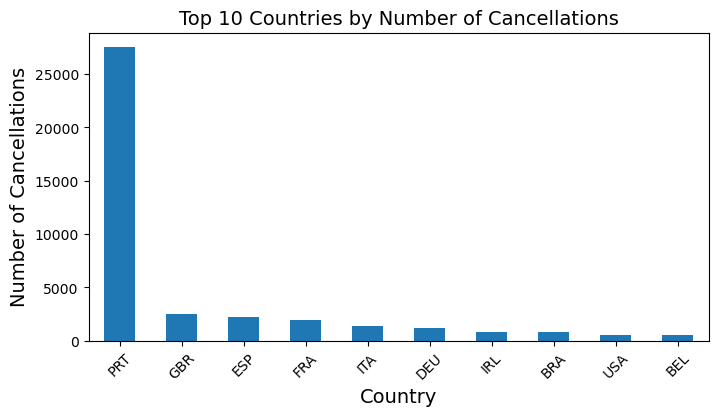

In [16]:
# Filter the dataset for canceled bookings
canceled_data = data[data['is_canceled'] == 1]

# Count the number of cancellations per country
cancellations_per_country = canceled_data['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 4))
cancellations_per_country.plot(kind='bar')
plt.title('Top 10 Countries by Number of Cancellations')
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()


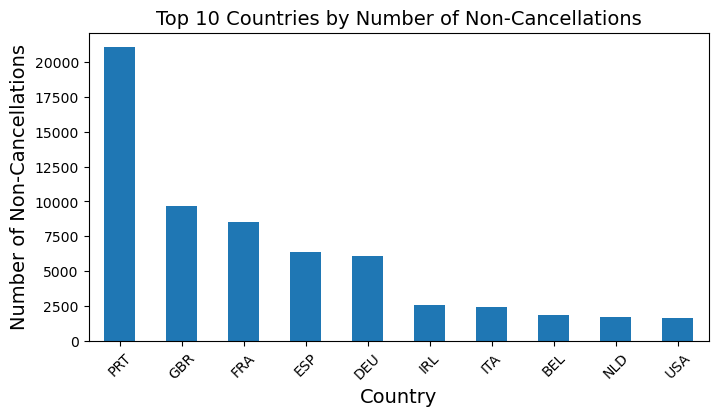

In [17]:
# Filter the dataset for canceled bookings
canceled_data = data[data['is_canceled'] == 0]

# Count the number of cancellations per country
cancellations_per_country = canceled_data['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 4))
cancellations_per_country.plot(kind='bar')
plt.title('Top 10 Countries by Number of Non-Cancellations')
plt.xlabel('Country')
plt.ylabel('Number of Non-Cancellations')
plt.xticks(rotation=45)
plt.show()

The three bar charts represent the top 10 countries by count of customers, number of cancellations, and number of non-cancellations at a hotel. 

The country with the highest number of customers and non-cancellations is Portugal (PRT), followed by Great Britain (GBR), indicating a strong customer base from these countries. 
The cancellation chart also shows Portugal leading by a significant margin, suggesting either a higher booking volume that naturally leads to more cancellations or a potential issue that leads to a higher cancellation rate. 
The presence of certain countries like the United States (USA) in the top 10 for cancellations but not for non-cancellations could indicate different booking behaviors or economic factors affecting travel decisions. 

Overall, there's a clear pattern that countries with higher booking counts also have higher cancellations.